# ML Model Comparison for Diabetes dataset
# By Mervin Ogawa

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [ ]:
df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Showing the distribution for all factors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f709da9fa10>,
      dtype=object)

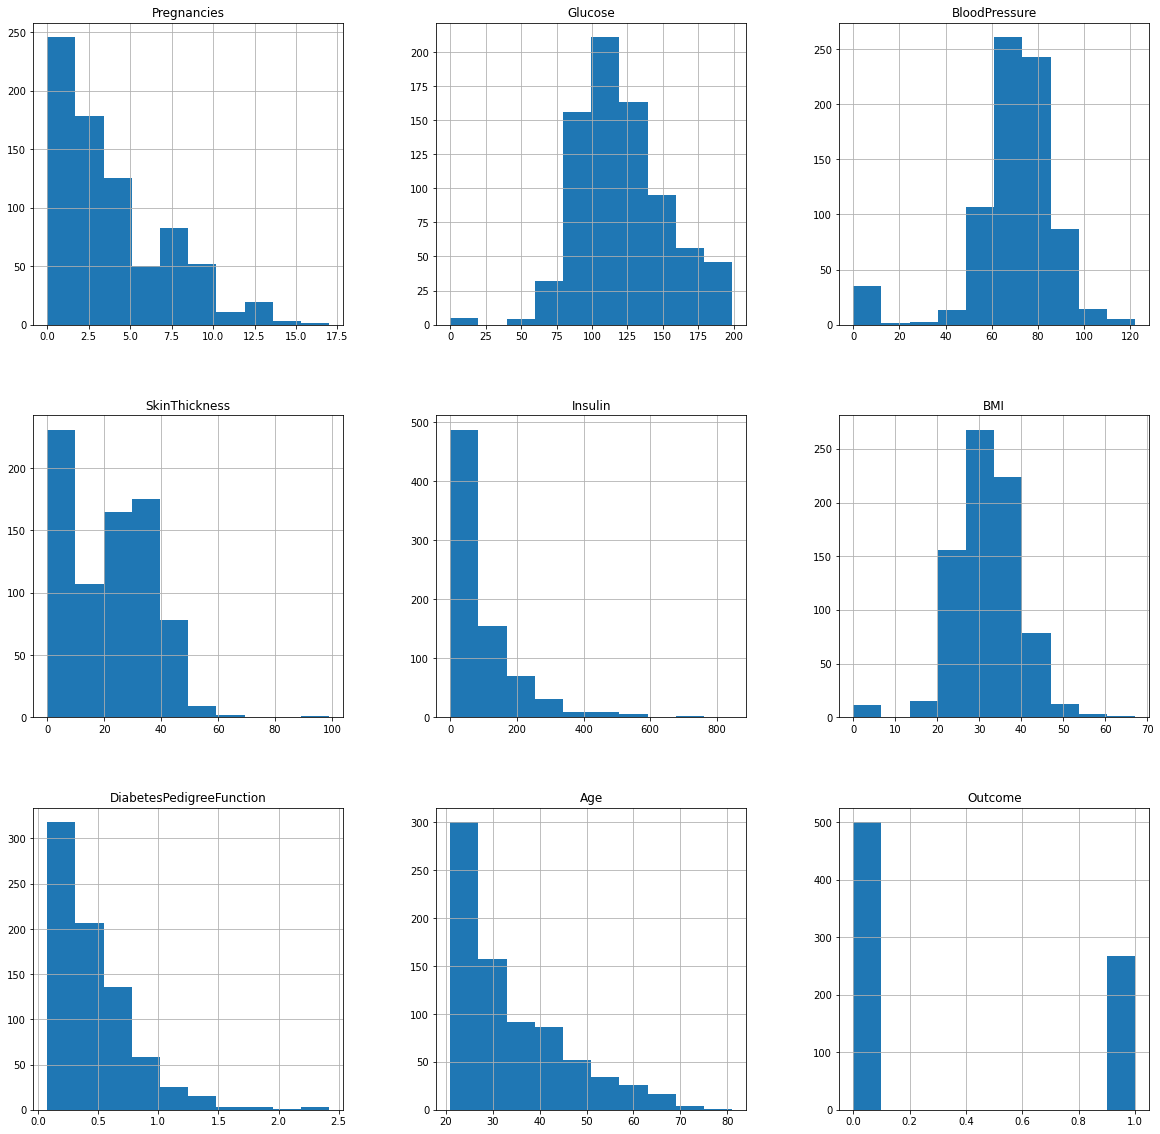

In [ ]:
df.hist(figsize = (20,20))

# Checking data for missing values (null)

In [ ]:
df.isnull().sum() # or df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Displaying descriptive statistics (count, mean, std, min, max, etc.)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Correlation matrix and heatmap plot

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

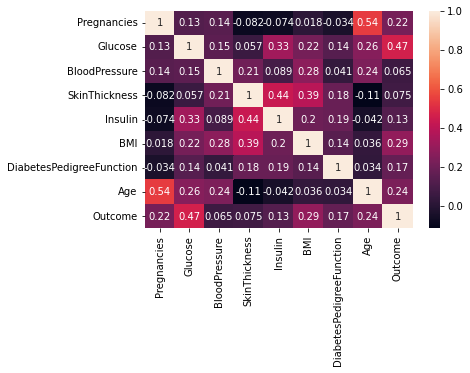

In [ ]:
data = df.columns.values.tolist()
corr_matrix = df.loc[:,data].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)

# Drawing boxplots

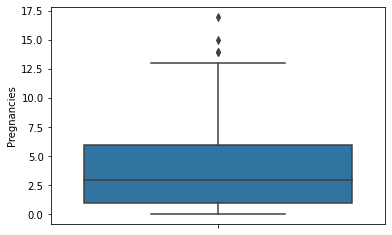

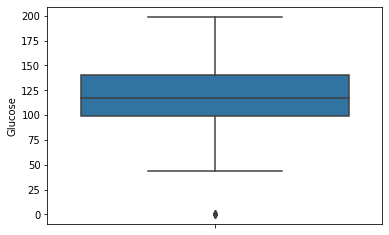

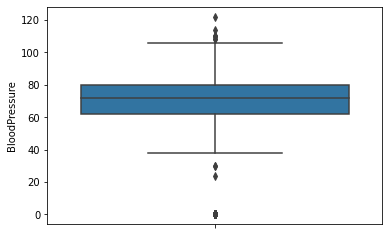

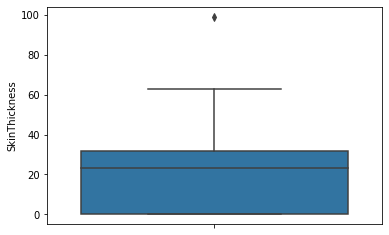

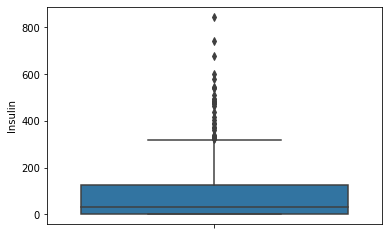

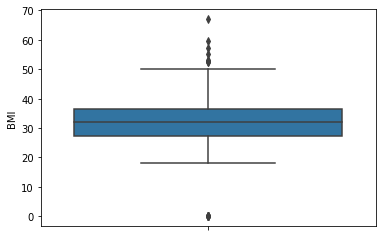

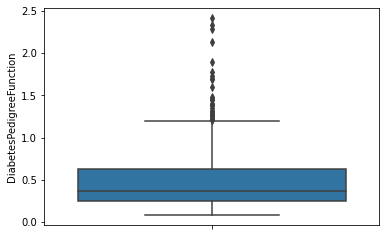

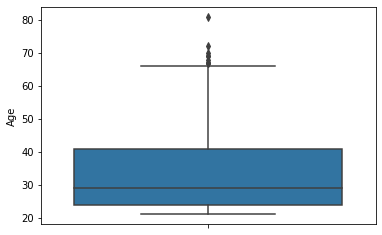

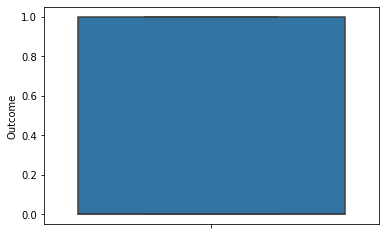

In [ ]:
for column in df:
    plt.figure()
    sns.boxplot(y=df[column])


# Replace the zero values with null(NaN) in the following columns "Glucose","BloodPressure","SkinThickness","Insulin","BMI" 
#(later, these null values will be replaced with the mean value of each variable)
#** Diabetes Pedigree Function and Age do not have 0 values.

In [ ]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


# Replace the null values of the following columns with its corresponding mean values

    Glucose
    BloodPressure
    SkinThickness
    Insulin
    BMI


In [ ]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


# Checking again for null values

In [ ]:
df.isnull().sum() # or df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data preprocessing

In [ ]:
X = df.iloc[:,:-1].values # getting all rows and columns except for final column
y = df.iloc[:,-1].values # the final column

# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression model on the Training set

In [ ]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression(random_state = 0)

#fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Checking accuracy, precision and recall of Logistic Regression model

In [ ]:
#import the class
import sklearn.metrics as metrics

#predicting the test set
y_pred = logreg.predict(X_test)

#get accuracy
logreg_accuracy = metrics.accuracy_score(y_test, y_pred)

#get precision
logreg_precision = metrics.precision_score(y_test, y_pred)

#get recall
logreg_recall = metrics.recall_score(y_test, y_pred)

print("Accuracy: ", logreg_accuracy)
print("Precision: ", logreg_precision)
print("Recall: ", logreg_recall)

Accuracy:  0.7864583333333334
Precision:  0.723404255319149
Recall:  0.5483870967741935


# Confusion Matrix and Classification Report of the Logistic Regression model

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[117  13]
 [ 28  34]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.72      0.55      0.62        62

    accuracy                           0.79       192
   macro avg       0.77      0.72      0.74       192
weighted avg       0.78      0.79      0.78       192



#Random Forest model on the Training set

In [ ]:
#import the class
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
rndforest = RandomForestClassifier(n_estimators=200)

#fit the model with data
rndforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

# Checking accuracy, precision and recall of Random Forest model

In [ ]:
#predicting the test set
y_pred = rndforest.predict(X_test)

#get accuracy
rndforest_accuracy = metrics.accuracy_score(y_test, y_pred)

#get precision
rndforest_precision = metrics.precision_score(y_test, y_pred)

#get recall
rndforest_recall = metrics.recall_score(y_test, y_pred)

print("Accuracy: ", rndforest_accuracy)
print("Precision: ", rndforest_precision)
print("Recall: ", rndforest_recall)

Accuracy:  0.78125
Precision:  0.7
Recall:  0.5645161290322581


# Confusion Matrix and Classification Report of the Random Forest model

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[115  15]
 [ 27  35]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       130
           1       0.70      0.56      0.62        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.74       192
weighted avg       0.77      0.78      0.77       192



# Decision Tree model on the Training set

In [ ]:
#import the class
from sklearn.tree import DecisionTreeClassifier

#instantiate the model
decisiontree = DecisionTreeClassifier()

#fit the model with data
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

# Checking accuracy, precision and recall of Decision Tree model

In [ ]:
#predicting the test set
y_pred = decisiontree.predict(X_test)

#get accuracy
decisiontree_accuracy = metrics.accuracy_score(y_test, y_pred)

#get precision
decisiontree_precision = metrics.precision_score(y_test, y_pred)

#get recall
decisiontree_recall = metrics.recall_score(y_test, y_pred)

print("Accuracy: ", decisiontree_accuracy)
print("Precision: ", decisiontree_precision)
print("Recall: ", decisiontree_recall)

Accuracy:  0.7552083333333334
Precision:  0.6190476190476191
Recall:  0.6290322580645161


# Confusion Matrix and Classification Report of the Decision Tree model

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[106  24]
 [ 23  39]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       130
           1       0.62      0.63      0.62        62

    accuracy                           0.76       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.76      0.76      0.76       192



# Support Vector Machine (SVM) model on the Training set

In [ ]:
#import the class
from sklearn.svm import SVC

#instantiate the model
svm = SVC()

#fit the model with data
svm.fit(X_train, y_train)

SVC()

# Checking accuracy, precision and recall of Support Vector Machine (SVM) model

In [ ]:
#predicting the test set
y_pred = svm.predict(X_test)

#get accuracy
svm_accuracy = metrics.accuracy_score(y_test, y_pred)

#get precision
svm_precision = metrics.precision_score(y_test, y_pred)

#get recall
svm_recall = metrics.recall_score(y_test, y_pred)

print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)

Accuracy:  0.765625
Precision:  0.6888888888888889
Recall:  0.5


# Confusion Matrix and Classification Report of the SVM model

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[116  14]
 [ 31  31]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       130
           1       0.69      0.50      0.58        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.75       192



# Accuracy of Models

In [ ]:
model_accuracy = {'Model': ['Logistic Regression','Random Forest','Decision Tree','Support Vector Machine'],
                  'Accuracy': [logreg_accuracy, rndforest_accuracy,decisiontree_accuracy,svm_accuracy],
                  'Precision': [logreg_precision, rndforest_precision,decisiontree_precision,svm_precision],
                  'Recall': [logreg_recall, rndforest_recall,decisiontree_recall,svm_recall]
                  }

df_model = pd.DataFrame(model_accuracy,columns=['Model','Accuracy',"Precision","Recall"])
df_model


,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.786458,0.723404,0.548387
1,Random Forest,0.781250,0.700000,0.564516
2,Decision Tree,0.755208,0.619048,0.629032
3,Support Vector Machine,0.765625,0.688889,0.500000


# Graphing the Accuracy, Precision and Recall of Models

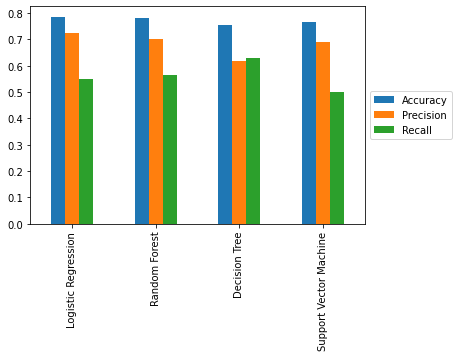

In [ ]:
df_model.plot(kind = 'bar')
plt.xticks(df_model.index,df_model["Model"].values)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Predicting a result using Logistic Regression

In [ ]:
preg = 1
gluc = 89
bp =  66
skinth = 23
insulin = 94
bmi = 28.1
diabpedfunc = 0.167
age = 21

#actual result is 0

y_pred = logreg.predict(scaler.transform([[preg,gluc,bp,skinth,insulin,bmi,diabpedfunc,age]]))
y_pred

array([0])